# **Training a Perceptron to Implement an XOR Gate**


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia



## Synthetic Data Preparation

[0 1 1 0]


Text(0.5,1,'XOR function. Reds are zero, and blues are 1')

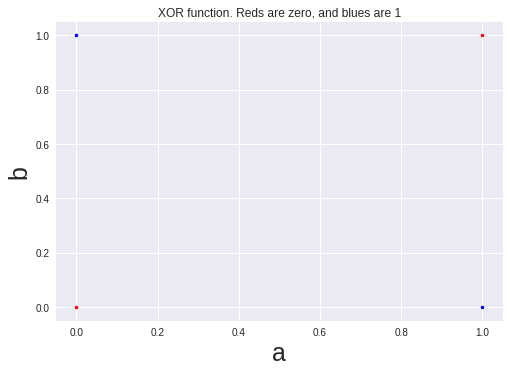

In [ ]:
import numpy as np                   #this is our old friend, the handy NumPy
import matplotlib.pyplot as plt      # matplotlib takes cares of ploting   
fig, ax = plt.subplots()


def XOR(a,b):
  return np.where(a != b, 1, 0)

      
training_size=4      
# we create a synthetic data set      
x_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.zeros((1,4))

y_train=XOR(x_train[:,0],x_train[:,1])


print(y_train)

for xx in x_train:
  if (XOR(xx[0],xx[1])==1):
    ax.plot(xx[0],xx[1],'b.')
  else:
    ax.plot(xx[0],xx[1],'r.')

plt.xlabel("a", fontsize=25)
plt.ylabel("b", fontsize=25)
plt.title('XOR function. Reds are zero, and blues are 1')



In [ ]:
def LogisticRegression(W,x):
  y = x.dot(W)
  return sigmoid(y)

def sigmoid(y):
  return 1/(1+np.exp(-y))

def DecisionBoundary(p):
  k=len(p)
  result=np.zeros((k,1))
  for i in range(k):
    if(p[i]>0.5):
      result[i]=1
    else:
      result[i]=0
  return result    

  
def CrossEntropy(y_hat,y):
  
  return 1/np.size(y_hat)*(y.T.dot(np.log(y_hat)) - (1-y).T.dot((np.log(1-y_hat))))
  

  



## Logistic Regression

In [ ]:

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np






x_trainp=np.c_[np.ones((int(training_size))),x_train]  #padding x_train with ones

y_train = np.reshape(y_train,(np.size(y_train),1))




alpha = 2
n_iterations = 100
m = training_size  


np.random.seed(seed=80)
W = 5*np.random.randn(3,1) # we start from a randomly initialzied set of parameters for Logistic Regression


Wtrajectory=np.array(W)



for iteration in range(n_iterations):
    gradients = 1/m * x_trainp.T.dot(sigmoid(x_trainp.dot(W)) - y_train) #this is pretty much similiar to gradient in Linear Regression, but y_hat has a different definition.
    W = W - alpha * gradients   # learning algorithm, we follow the gradient. 
    Wtrajectory=np.hstack((Wtrajectory,W))
    y_hat = LogisticRegression(W,x_trainp)
    CE = CrossEntropy(y_hat,y_train)
    Binary_result=DecisionBoundary(y_hat)
    num_correct_predition=np.sum(y_train == Binary_result)

  
    print("Epoch %d/%d"%(iteration+1,n_iterations))  #here we are printing readable outputs to track the performance of the optimization as GD iterates
    print("loss:  %s - acc: %s"%(CE,num_correct_predition/len(y_train))) 
  











Epoch 1/100
loss:  [[5.37969986]] - acc: 0.5
Epoch 2/100
loss:  [[4.62978243]] - acc: 0.5
Epoch 3/100
loss:  [[3.87992253]] - acc: 0.5
Epoch 4/100
loss:  [[3.1299998]] - acc: 0.5
Epoch 5/100
loss:  [[2.37952763]] - acc: 0.5
Epoch 6/100
loss:  [[1.63160625]] - acc: 0.5
Epoch 7/100
loss:  [[0.93762517]] - acc: 0.5
Epoch 8/100
loss:  [[0.46686018]] - acc: 0.25
Epoch 9/100
loss:  [[0.25820921]] - acc: 0.5
Epoch 10/100
loss:  [[0.17143844]] - acc: 0.5
Epoch 11/100
loss:  [[0.13190485]] - acc: 0.5
Epoch 12/100
loss:  [[0.11205397]] - acc: 0.5
Epoch 13/100
loss:  [[0.10051309]] - acc: 0.5
Epoch 14/100
loss:  [[0.09240127]] - acc: 0.5
Epoch 15/100
loss:  [[0.08569069]] - acc: 0.5
Epoch 16/100
loss:  [[0.07959774]] - acc: 0.5
Epoch 17/100
loss:  [[0.0738521]] - acc: 0.5
Epoch 18/100
loss:  [[0.06837959]] - acc: 0.5
Epoch 19/100
loss:  [[0.06317328]] - acc: 0.5
Epoch 20/100
loss:  [[0.05824441]] - acc: 0.5
Epoch 21/100
loss:  [[0.05360487]] - acc: 0.5
Epoch 22/100
loss:  [[0.04926163]] - acc: 0.

In [ ]:
print("P(y=1|x) for [[0,0], [0,1], [1,0],[1,1]]")
print(y_hat)
print("Predicted Outputs=")
print(DecisionBoundary(y_hat))